# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [27]:
# TODO: Make all necessary imports.
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns
import sklearn.metrics
import json
import os
from PIL import Image


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
# # TODO: Load the dataset with TensorFlow Datasets.
dataset, info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

# # TODO: Create a training set, a validation set and a test set.
train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']




Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.99s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:02<00:03,  1.99s/ url]
Dl Size...: 0 MiB [00:02, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<14:34,  2.67s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<14:31,  2.67s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<14:29,  2.67s/ MiB]

D

Dl Size...:  35%|███▌      | 115/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  36%|███▌      | 117/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:07<00:10, 20.53 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00:07<00:09, 20.53 MiB/s]

Dl Size...:  40%|███▉    

Dl Size...:  72%|███████▏  | 236/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:11<00:03, 27.60 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:11<00:02, 27.60 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:11<00:02, 27.60 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:11<00:02, 27.60 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:11<00:02, 27.60 MiB/s]

Dl Size...:  76%|███████▌  | 250/328 [00:11<00:02, 27.60 MiB/s]

Dl Size...:  77%|███████▋

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:26<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:33<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:34<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:41<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:42<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Extraction completed...:  24%|██▍       | 1953/8189 [01:51<01:01, 101.47 file/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 27.94 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:00<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Extraction completed...:  44%|████▍     | 3617/8189 [02:03<00:32, 141.46 file/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 27.94 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:08<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:09<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 27.94 MiB/s]



Dl Size...: 100%|██████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:16<00:00, 27.94 MiB/s]

Extraction completed...: 

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Extraction completed...:  69%|██████▉   | 5652/8189 [02:17<00:18, 134.25 file/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:17<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:18<00:00, 27.94 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Extraction completed...:  76%|███████▌  | 6200/8189 [02:22<00:14, 133.65 file/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:30<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:31<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:32<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:35<00:00, 27.94 MiB/s]

Dl Size...: 100%|████████

## Explore the Dataset

In [7]:
# TODO: Get the number of examples in each set from the dataset info.
num_train_examples = info.splits['train'].num_examples
num_validation_examples = info.splits['validation'].num_examples
num_test_examples = info.splits['test'].num_examples

# TODO: Get the number of classes in the dataset from the dataset info.
num_classes = info.features['label'].num_classes

print(f"Number of training examples: {num_train_examples}")
print(f"Number of validation examples: {num_validation_examples}")
print(f"Number of test examples: {num_test_examples}")
print(f"Number of classes: {num_classes}")

Number of training examples: 1020
Number of validation examples: 1020
Number of test examples: 6149
Number of classes: 102


In [10]:
# TODO: Print the shape and corresponding label of 3 images in the training set.
for i, (image, label) in enumerate(train_data.take(3)):
    print(f"Image shape: {image.shape}")
    print(f"Label: {label.numpy()}")
    print("------------")

Image shape: (32, 224, 224, 3)
Label: [93 86 62 25 89 55 70 15 13 46 89 38 59  7 55 94 73 51 37 59 90 71 35 48
 52 45 98 26 77 79 34 42]
------------
Image shape: (32, 224, 224, 3)
Label: [84 73 26  8 85 22  8 45 98 92 18 32 98 59 42 54 10 41 40 51 27 27 47 58
 54 58  6 85 85 30 81  2]
------------
Image shape: (32, 224, 224, 3)
Label: [ 57  37  65   4  52  56  10  53  24  29  35   5  51  31  79  70  23  34
  51  13  77  75  44  63  32  13  83  41  20  31 100  77]
------------


Image shape: (224, 224, 3)
Label: 42


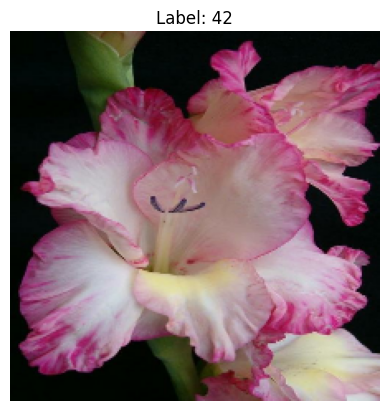

Image shape: (224, 224, 3)
Label: 9


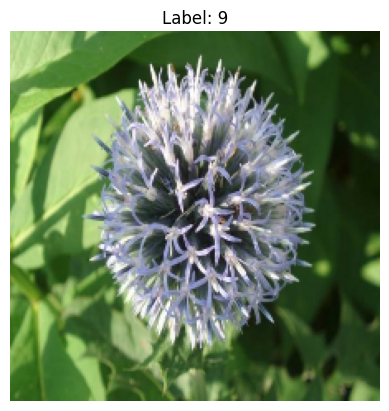

Image shape: (224, 224, 3)
Label: 61


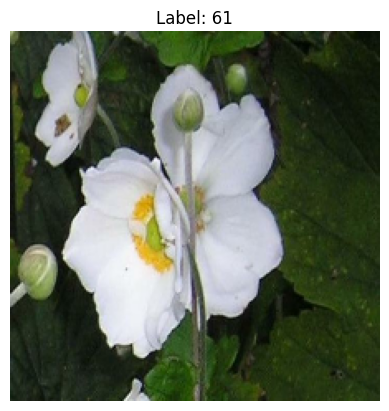

In [18]:
# # TODO: Plot 1 image from the training set. Set the title 
# # of the plot to the corresponding image label. 



for i, (images, labels) in enumerate(train_data.take(1)):  
    for j in range(3):  
        image = images[j]
        label = labels[j]
        image = tf.cast(image, tf.float32) * 255.0

        # Print the image shape and label
        print(f"Image shape: {image.shape}")
        print(f"Label: {label.numpy()}")  

        
        plt.figure()
        plt.imshow(image.numpy().astype("uint8"))  
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')  
        plt.show()


### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [2]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

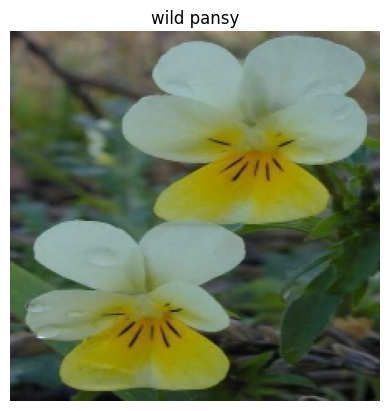

In [27]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

for image, label in train_data.take(1):
    image = tf.cast(image[0], tf.float32) * 255.0
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(class_names[str(label[0].numpy())])
    plt.axis('off')
    plt.show()

## Create Pipeline

In [17]:
# TODO: Create a pipeline for each set.


# resize and normalize images
def process_image(image, label):
    print("hfj",image.shape)  # Debugging: Print the shape of the input image
#     image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, [224, 224])
#     image = image / 255.0
    return image, label

# dataset, info = tfds.load('oxford_flowers102', as_supervised=True, with_info=True)

train_data = dataset['train']
validation_data = dataset['validation']
test_data = dataset['test']

BATCH_SIZE = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Pipeline for the training data
train_data = train_data.map(process_image, num_parallel_calls=AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000)
train_data = train_data.batch(BATCH_SIZE)
train_data = train_data.prefetch(buffer_size=AUTOTUNE)

# Pipeline for the validation data
validation_data = validation_data.map(process_image, num_parallel_calls=AUTOTUNE)
validation_data = validation_data.batch(BATCH_SIZE)
validation_data = validation_data.prefetch(buffer_size=AUTOTUNE)

# Pipeline for the test data
test_data = test_data.map(process_image, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE)
test_data = test_data.prefetch(buffer_size=AUTOTUNE)


hfj (None, None, 3)
hfj (None, None, 3)
hfj (None, None, 3)


Image shape: (224, 224, 3)
Label: 14


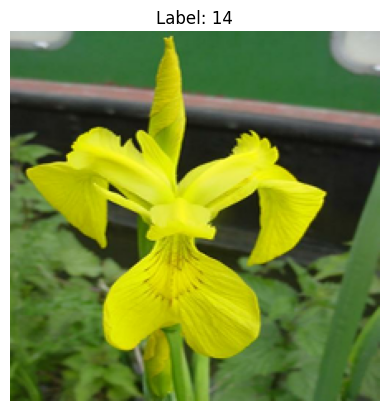

Image shape: (224, 224, 3)
Label: 68


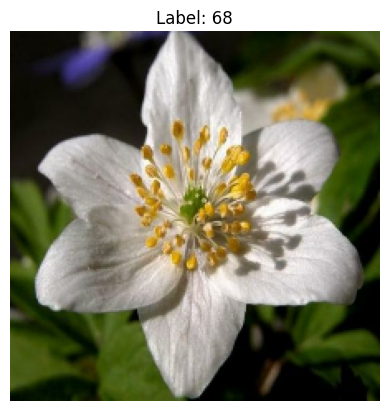

Image shape: (224, 224, 3)
Label: 62


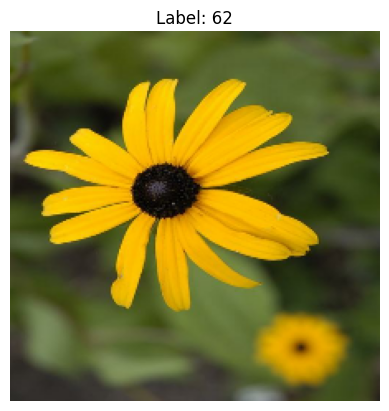

In [13]:
# loop the 'train_data' and print the shape and label of 3 images
for i, (images, labels) in enumerate(train_data.take(1)):  
    for j in range(3):  # set the range for more or less images
        image = images[j]
        label = labels[j]
#         image = tf.cast(image, tf.float32) * 255.0

        # Print image shape and label
        print(f"Image shape: {image.shape}")
        print(f"Label: {label.numpy()}")  

        # Display image
        plt.figure()
        plt.imshow(image.numpy().astype("uint8")) 
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')  
        plt.show()


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2024-08-18 22:23:30.945750: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.
Epoch 1/10
92/92 [==============================] - 545s 6s/step - loss: 1.5537 - accuracy: 0.3787 - val_loss: 1.1833 - val_accuracy: 0.4973
Epoch 2/10
92/92 [==============================] - 558s 6s/step - loss: 1.0824 - accuracy: 0.5743 - val_loss: 0.8919 - val_accuracy: 0.6526
Epoch 3/10
92/92 [==============================] - 560s 6s/step - loss: 0.9332 - accuracy: 0.6328 - val_loss: 0.8647 - val_accuracy: 0.6567
Epoch 4/10
92/92 [==============================] - 560s 6s/step - loss: 0.8452 - accuracy: 0.6829 - val_loss: 0.7973 - val_accuracy: 0.6880
Epoch 5/10
92/92 [==============================] - 581s 6s/step - loss: 0.7230 - accuracy: 0.7255 - val_loss: 0.7747 - val_accuracy: 0.7030
Epoch 6/10
92/92 [==============================] - 547s 6s/step - loss: 0.6215 - accuracy: 0.7769 - val_loss: 0.8043 - val_accuracy: 0.6935
Epoch 7/10
92/92 [==============================] - 548s 6s/step - loss: 0.5233 -

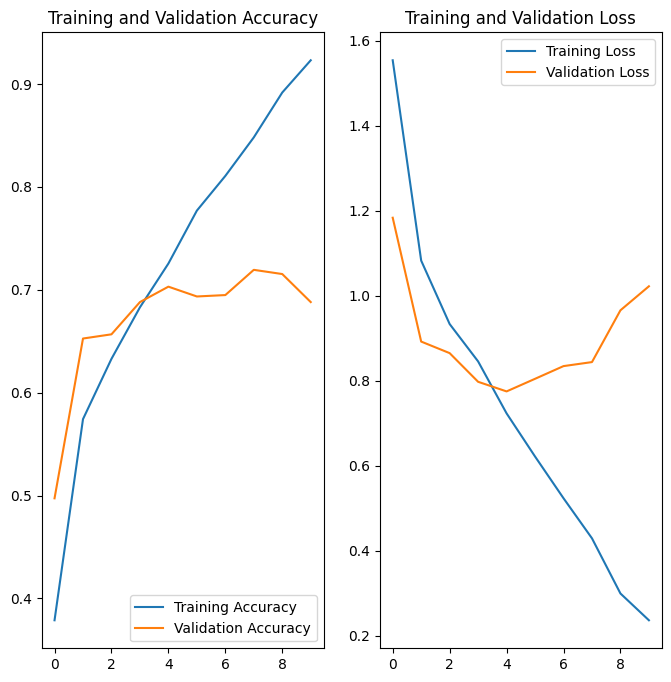

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# # TODO: Build and train your network.

# # Load the MobileNet pre-trained model from TensorFlow Hub
# module_handle = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
# mobile_net = hub.KerasLayer(module_handle, input_shape=[224, 224, 3], trainable=False)



dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)

# parameters
batch_size = 32
img_height = 224
img_width = 224
epochs = 10


train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# The CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(102, activation='softmax')  # 102 classes for the Oxford Flowers dataset
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()




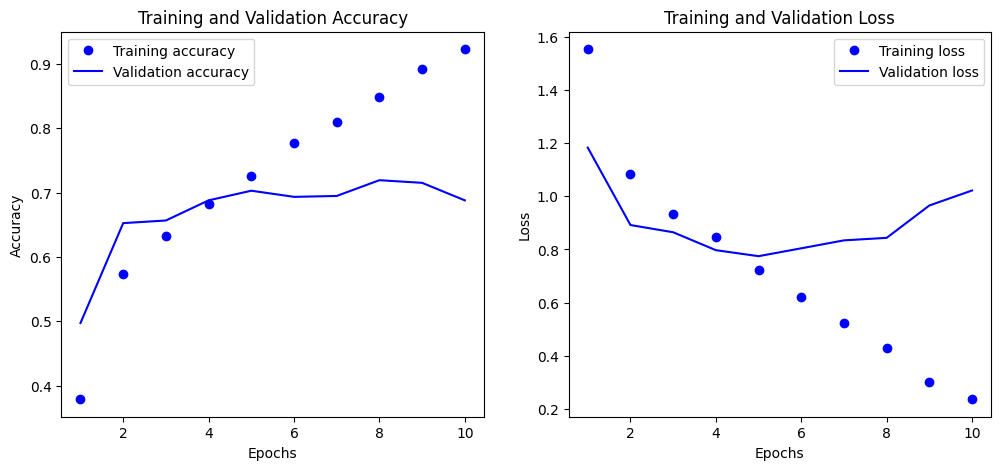

In [25]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [10]:
# TODO: Print the loss and accuracy values achieved on the entire test set.
test_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  
    subset="validation",  # Use the "validation" subset as a test set
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(acc)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
23/23 [==============================] - 34s 1s/step - loss: 320.0242 - accuracy: 0.5817
Test Loss: 320.024169921875
Test Accuracy: 0.5817438960075378
[0.3787465989589691, 0.5742506980895996, 0.6328337788581848, 0.682901918888092, 0.725476861000061, 0.7769073843955994, 0.8106266856193542, 0.8480926156044006, 0.8916893601417542, 0.9230245351791382]


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [11]:
# TODO: Save your trained model as a Keras model.

model.save("flower_classification_cnn.h5")

## Load the Keras Model

Load the Keras model you saved above.

In [12]:
# TODO: Load the Keras model
from tensorflow.keras.models import load_model
model_load = load_model('flower_classification_cnn.h5')
model=model_load

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

1/1 [==============================] - 0s 51ms/step


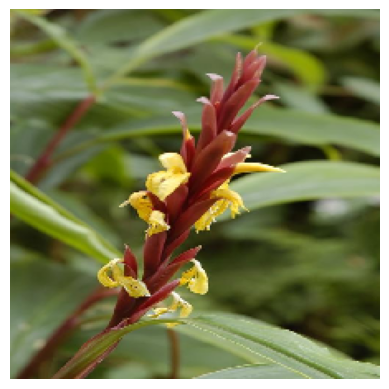

1/1 [==============================] - 0s 43ms/step
Probabilities: [9.8506922e-01 7.9350173e-03 5.8229598e-03 1.0444652e-03 1.2819501e-04]
Classes: ['2', '4', '3', '0', '1']


In [18]:
# TODO: Create the process_image function
# Function to predict and display results


def process_image(image):
    image = tf.convert_to_tensor(image)
    image = tf.image.resize(image, [224, 224])
    # Normalize the pixel values to [0, 1] range
    image = image / 255.0
    # Convert back to NumPy array
    image = image.numpy()
    
    return image



To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

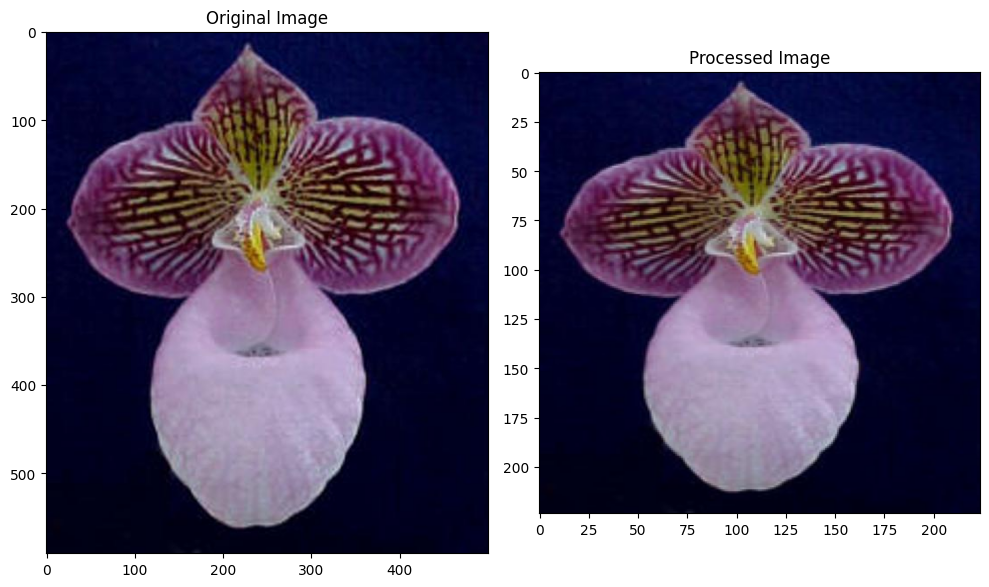

In [19]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

1/1 [==============================] - 0s 27ms/step


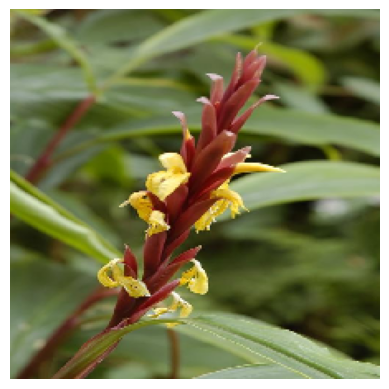

1/1 [==============================] - 0s 36ms/step
Probabilities: [9.8506922e-01 7.9350173e-03 5.8229598e-03 1.0444652e-03 1.2819501e-04]
Classes: ['2', '4', '3', '0', '1']


In [20]:
# TODO: Create the predict function

def predict(image_path, model,top_k):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    image = Image.open(image_path)
    image = np.asarray(image)
    processed_image = process_image(image)
    
    processed_image = np.expand_dims(processed_image, axis=0)
    predictions = model.predict(processed_image)
    
    # top K predictions
    top_k_probs = np.sort(predictions[0])[-top_k:][::-1]
    top_k_classes = np.argsort(predictions[0])[-top_k:][::-1]
    
    # Convert to strings
    top_k_classes = [str(class_id) for class_id in top_k_classes]
    
    return top_k_probs, top_k_classes

image_path = './test_images/cautleya_spicata.jpg'
top_k = 5

probs, classes = predict(image_path, model, top_k)

print("Probabilities:", probs)
print("Classes:", classes)

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

In [28]:
def load_class_names_from_json(json_file_path):
    with open(json_file_path, 'r') as file:
        class_data = json.load(file)
    
    
    class_names = [class_data[str(i)] for i in sorted(map(int, class_data.keys()))]
    
    return class_names


json_file_path = './label_map.json'  # Replace with the path to your JSON file
class_names = load_class_names_from_json(json_file_path)

print(class_names)  # debug

['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'ca

1/1 [==============================] - 0s 74ms/step


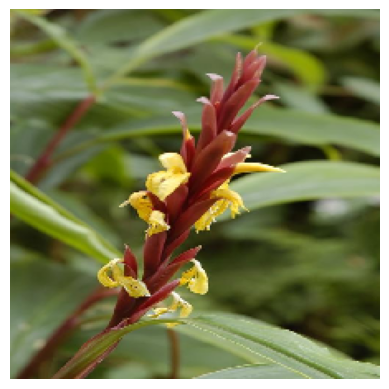

1/1 [==============================] - 0s 46ms/step


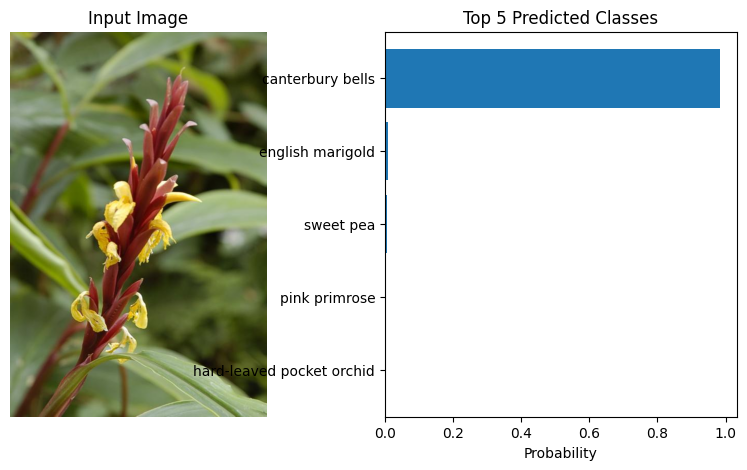

In [24]:
# TODO: Plot the input image along with the top 5 classes
def plot_image_and_predictions(image_path, model, top_k=5):
    image = Image.open(image_path)
    image_np = np.asarray(image)
    processed_image = process_image(image_np)
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

    probs, classes = predict(image_path, model, top_k)
    
    class_names_predictions = [class_names[int(cls)] for cls in classes]
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Input Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.barh(class_names_predictions, probs)
    plt.xlabel("Probability")
    plt.title("Top {} Predicted Classes".format(top_k))
    plt.gca().invert_yaxis()  # Highest probability at the top
    
    plt.show()


image_path = './test_images/cautleya_spicata.jpg'  # Replace with the correct path to your image
plot_image_and_predictions(image_path, model, top_k=5)